# Italian Financial Challenge - Starter Template

**Student Name:** [Your Name]

**Challenge:** [Choose: Bankruptcy Prediction / Financial Health Classification / Revenue Forecasting]

**Date:** [Date]

---

## Instructions

This template provides a suggested structure for your challenge solution. You can adapt it to your needs, but make sure to cover all required sections:

1. Problem Statement and Objectives
2. Data Loading and Exploration
3. Data Preprocessing
4. Feature Engineering
5. Model Development
6. Model Evaluation
7. Interpretation and Business Insights
8. Conclusions and Future Work

**Remember:**
- Document your thought process with markdown cells
- Comment your code clearly
- Create visualizations to support your insights
- Interpret results in business terms
- Check the evaluation rubric to ensure you meet all criteria

## 1. Problem Statement and Objectives

**Challenge:** [Describe which challenge you chose and why]

**Objective:** [State the prediction goal clearly]

**Success Criteria:** [Define what "good" performance looks like for your chosen challenge]

**Approach:** [Briefly outline your planned approach]

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading and Exploration

Load the training data and perform initial exploration.

In [21]:
# Load training data
train_df = pd.read_csv('../data/processed/train_data.csv')

print(f"Dataset shape: {train_df.shape}")
print(f"\nColumns: {train_df.columns.tolist()}")
print(f"\nFirst few rows:")
train_df.head()

Dataset shape: (11828, 30)

Columns: ['company_id', 'fiscal_year', 'province', 'region', 'ateco_sector', 'legal_form', 'years_in_business', 'total_fixed_assets', 'current_assets', 'total_assets', 'shareholders_equity', 'total_debt', 'short_term_debt', 'long_term_debt', 'production_value', 'production_costs', 'operating_income', 'financial_income', 'financial_expenses', 'net_profit_loss', 'roe', 'roi', 'leverage', 'current_ratio', 'quick_ratio', 'debt_to_assets', 'profit_margin', 'bankruptcy_next_year', 'financial_health_class', 'revenue_change']

First few rows:


,company_id,fiscal_year,province,region,ateco_sector,legal_form,years_in_business,total_fixed_assets,current_assets,total_assets,shareholders_equity,total_debt,short_term_debt,long_term_debt,production_value,production_costs,operating_income,financial_income,financial_expenses,net_profit_loss,roe,roi,leverage,current_ratio,quick_ratio,debt_to_assets,profit_margin,bankruptcy_next_year,financial_health_class,revenue_change
0,COMP_00000,2018,NaN,Campania,47,SRL,32,2.422343e+08,9.504819e+08,1.192716e+09,3.728702e+08,8.198459e+08,5.601842e+08,2.596617e+08,1.846636e+09,1.611363e+09,2.352729e+08,4886785.12,20068071.29,2.152049e+08,0.5772,0.1973,2.1987,1.6967,1.0180,0.6874,0.1165,0,B,NaN
1,COMP_00000,2019,NaN,Campania,47,SRL,33,3.983639e+07,1.411226e+08,1.809589e+08,5.700701e+07,1.239519e+08,7.135345e+07,5.259848e+07,4.289159e+08,3.896038e+08,3.931218e+07,58246.06,2537224.20,3.677495e+07,0.6451,0.2172,2.1743,1.9778,1.1867,0.6850,0.0857,0,B,-76.77
2,COMP_00000,2020,NaN,Campania,47,SRL,34,6.662250e+08,1.367208e+09,2.033433e+09,3.029046e+08,1.730529e+09,9.904004e+08,7.401282e+08,6.956197e+09,6.988489e+09,-3.229208e+07,5327332.51,55844558.38,-8.813664e+07,-0.2910,-0.0159,5.7131,1.3805,0.8283,0.8510,-0.0127,0,D,1521.81
3,COMP_00000,2021,NaN,Campania,47,SRL,35,4.637187e+07,2.524228e+08,2.987947e+08,3.901098e+07,2.597837e+08,1.527674e+08,1.070163e+08,5.031839e+08,5.047235e+08,-1.539645e+06,116335.80,7828741.61,-9.368387e+06,-0.2401,-0.0052,6.6592,1.6523,0.9914,0.8694,-0.0186,0,D,-92.77
4,COMP_00001,2018,CA,Sardegna,62,SRL,8,8.348035e+07,1.325697e+08,2.160500e+08,6.566937e+07,1.503807e+08,7.582482e+07,7.455584e+07,4.113380e+08,3.912414e+08,2.009667e+07,640538.94,5860639.22,1.423603e+07,0.2168,0.0930,2.2900,1.7484,1.0490,0.6960,0.0346,0,B,NaN


In [22]:
# Basic information
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11828 entries, 0 to 11827
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_id              11828 non-null  str    
 1   fiscal_year             11828 non-null  int64  
 2   province                10909 non-null  str    
 3   region                  11828 non-null  str    
 4   ateco_sector            11828 non-null  int64  
 5   legal_form              11828 non-null  str    
 6   years_in_business       11828 non-null  int64  
 7   total_fixed_assets      11828 non-null  float64
 8   current_assets          11828 non-null  float64
 9   total_assets            11828 non-null  float64
 10  shareholders_equity     11828 non-null  float64
 11  total_debt              11828 non-null  float64
 12  short_term_debt         11828 non-null  float64
 13  long_term_debt          11828 non-null  float64
 14  production_value        11828 non-null  float64
 

In [23]:
# Summary statistics
train_df.describe()

,fiscal_year,ateco_sector,years_in_business,total_fixed_assets,current_assets,total_assets,shareholders_equity,total_debt,short_term_debt,long_term_debt,production_value,production_costs,operating_income,financial_income,financial_expenses,net_profit_loss,roe,roi,leverage,current_ratio,quick_ratio,debt_to_assets,profit_margin,bankruptcy_next_year,revenue_change
count,11828.000000,11828.000000,11828.000000,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,11783.000000,11828.000000,11783.000000,11828.000000,11828.000000,11828.000000,11828.000000,11828.000000,8829.000000
mean,2019.495350,45.827697,35.179405,1.029206e+09,1.438435e+09,2.467641e+09,9.163141e+08,1.551327e+09,8.534656e+08,6.978617e+08,3.969063e+09,3.680129e+09,2.889337e+08,6.418314e+06,5.464980e+07,2.342839e+08,0.254267,0.123253,2.135329,1.869953,1.121972,0.633231,0.058008,0.007102,453.434570
std,1.116482,16.677183,19.908095,6.120958e+09,6.873106e+09,1.248305e+10,5.023564e+09,7.724478e+09,4.360360e+09,3.493369e+09,1.896096e+10,1.757911e+10,1.574126e+09,3.930832e+07,2.850800e+08,1.348222e+09,0.577374,0.091036,2.159040,0.614015,0.368409,0.114868,0.039245,0.083976,4601.920625
min,2018.000000,10.000000,0.000000,1.267167e+06,1.278800e+06,2.545968e+06,-3.330561e+09,1.839791e+06,8.985461e+05,9.412449e+05,2.329670e+06,1.580518e+06,-2.688184e+09,6.241000e+01,5.926949e+04,-4.062689e+09,-39.177100,-0.475300,0.818200,0.551000,0.330600,0.450000,-0.149700,0.000000,-99.940000
25%,2018.000000,41.000000,18.000000,7.319803e+07,1.244471e+08,2.087793e+08,7.070428e+07,1.294646e+08,6.925617e+07,5.666362e+07,2.984883e+08,2.731290e+08,1.698626e+07,3.569547e+05,4.355200e+06,1.049173e+07,0.110350,0.061900,1.165650,1.430800,0.858500,0.538500,0.030500,0.000000,-68.590000
50%,2019.000000,46.000000,35.000000,1.905995e+08,3.125597e+08,5.212379e+08,1.815958e+08,3.264152e+08,1.744802e+08,1.462585e+08,8.040019e+08,7.459428e+08,5.128590e+07,1.068330e+06,1.110262e+07,3.798727e+07,0.221600,0.105000,1.680300,1.811750,1.087050,0.627500,0.060300,0.000000,3.040000
75%,2020.000000,56.000000,52.000000,5.398741e+08,8.387197e+08,1.394478e+09,5.022747e+08,8.795087e+08,4.777298e+08,3.960070e+08,2.241163e+09,2.075266e+09,1.538062e+08,3.178533e+06,3.005698e+07,1.226862e+08,0.390750,0.170900,2.484850,2.238925,1.343325,0.713800,0.090000,0.000000,238.850000
max,2021.000000,82.000000,71.000000,2.548712e+11,2.512549e+11,5.061262e+11,1.956145e+11,3.105116e+11,1.699685e+11,1.405431e+11,6.044366e+11,5.736470e+11,5.621927e+10,1.640114e+09,9.311030e+09,5.011818e+10,1.771600,0.490600,101.153800,4.539300,2.723600,1.192300,0.120000,1.000000,302126.480000


In [24]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_pct = (missing_values / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("Missing Values:")
print(missing_df)

Missing Values:
                Missing Count  Percentage
revenue_change           2999   25.355090
province                  919    7.769699
roe                        45    0.380453
leverage                   45    0.380453


In [25]:
# Target variable analysis
# TODO: Uncomment the relevant section for your challenge

# For Challenge 1: Bankruptcy Prediction
# print("\nBankruptcy Distribution:")
# print(train_df['bankruptcy_next_year'].value_counts())
# print(f"\nBankruptcy rate: {train_df['bankruptcy_next_year'].mean():.2%}")

# For Challenge 2: Financial Health Classification
# print("\nFinancial Health Distribution:")
# print(train_df['financial_health_class'].value_counts().sort_index())
# print("\nPercentages:")
# print(train_df['financial_health_class'].value_counts(normalize=True).sort_index())

# For Challenge 3: Revenue Forecasting
# print("\nRevenue Change Statistics:")
# print(train_df['revenue_change'].describe())
# print(f"\nMissing revenue_change: {train_df['revenue_change'].isnull().sum()}")

### Exploratory Data Analysis (EDA)

This EDA is purpose-built for Challenge 3 (Revenue Forecasting). Each step answers a modeling decision, avoids leakage, and respects financial meaning.



#### 1) Dataset sanity check (structure + time)



In [26]:
# Shape, dtypes, year coverage, and uniqueness of (company_id, fiscal_year)
print('Shape:', train_df.shape)

id_cols = [c for c in ['company_id', 'fiscal_year'] if c in train_df.columns]
if len(id_cols) == 2:
    dup_count = train_df.duplicated(id_cols).sum()
    print('Duplicate (company_id, fiscal_year):', dup_count)
else:
    print('Missing ID columns for uniqueness check:', id_cols)

if 'fiscal_year' in train_df.columns:
    print(train_df['fiscal_year'].value_counts().sort_index())

print(train_df.dtypes)


Shape: (11828, 30)
Duplicate (company_id, fiscal_year): 0
fiscal_year
2018    2961
2019    2979
2020    2956
2021    2932
Name: count, dtype: int64
company_id                    str
fiscal_year                 int64
province                      str
region                        str
ateco_sector                int64
legal_form                    str
years_in_business           int64
total_fixed_assets        float64
current_assets            float64
total_assets              float64
shareholders_equity       float64
total_debt                float64
short_term_debt           float64
long_term_debt            float64
production_value          float64
production_costs          float64
operating_income          float64
financial_income          float64
financial_expenses        float64
net_profit_loss           float64
roe                       float64
roi                       float64
leverage                  float64
current_ratio             float64
quick_ratio               float64
de

#### 2) Target-first EDA (revenue_change)

- View revenue_change over time (median and spread) to see cycles.
- If fiscal_year is missing, use firm age buckets as a proxy for time.
- Missingness reflects unavailable prior-year revenue, not errors.


In [27]:
# Target availability and missingness
TARGET = 'revenue_change'
if TARGET in train_df.columns:
    target_missing = train_df[TARGET].isna().sum()
    print('Missing revenue_change:', target_missing)
    print('Missing rate:', target_missing / len(train_df))
else:
    print('Target column not found:', TARGET)


Missing revenue_change: 2999
Missing rate: 0.25355089617855936


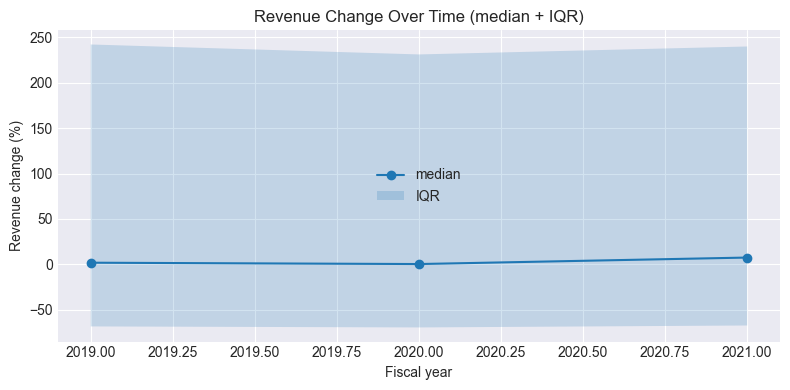

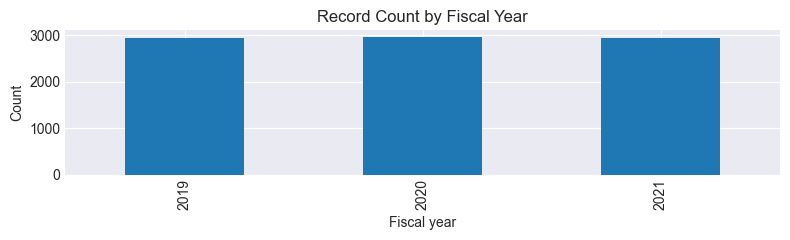

In [28]:
# Revenue change over time (median + IQR)
if TARGET in train_df.columns:
    if 'fiscal_year' in train_df.columns:
        tmp = train_df[['fiscal_year', TARGET]].dropna()
        yearly = tmp.groupby('fiscal_year')[TARGET]
        med = yearly.median()
        q1 = yearly.quantile(0.25)
        q3 = yearly.quantile(0.75)

        plt.figure(figsize=(8, 4))
        plt.plot(med.index, med.values, marker='o', label='median')
        plt.fill_between(med.index, q1.values, q3.values, alpha=0.2, label='IQR')
        plt.title('Revenue Change Over Time (median + IQR)')
        plt.xlabel('Fiscal year')
        plt.ylabel('Revenue change (%)')
        plt.legend()
        plt.tight_layout()

        # Sample counts to avoid misreading thin years
        counts = tmp.groupby('fiscal_year')[TARGET].size()
        plt.figure(figsize=(8, 2.5))
        counts.plot(kind='bar')
        plt.title('Record Count by Fiscal Year')
        plt.xlabel('Fiscal year')
        plt.ylabel('Count')
        plt.tight_layout()
    elif 'years_in_business' in train_df.columns:
        # Proxy timeline via age buckets
        tmp = train_df[['years_in_business', TARGET]].dropna()
        bins = [0, 2, 5, 10, 20, 50, 100]
        labels = ['0-2', '3-5', '6-10', '11-20', '21-50', '51+']
        age_bucket = pd.cut(
            tmp['years_in_business'],
            bins=bins,
            labels=labels,
            right=True,
            include_lowest=True,
        )
        bucket_med = tmp.groupby(age_bucket)[TARGET].median()
        plt.figure(figsize=(8, 4))
        bucket_med.plot(kind='bar')
        plt.title('Revenue Change by Firm Age Bucket')
        plt.xlabel('Years in business')
        plt.ylabel('Revenue change (%)')
        plt.tight_layout()
    else:
        print('No fiscal_year or years_in_business column to show time-based view.')
else:
    print('Target column not found:', TARGET)


#### 3) Outlier quantification (do not remove)

We quantify extreme values instead of removing them. Outliers may reflect real business events.



In [29]:
# IQR-based outlier counts for the target
if TARGET in train_df.columns:
    q1 = train_df[TARGET].quantile(0.25)
    q3 = train_df[TARGET].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_count = ((train_df[TARGET] < lower) | (train_df[TARGET] > upper)).sum()
    print('Target outliers (IQR rule):', outlier_count)
    print('Lower/Upper bounds:', lower, upper)


Target outliers (IQR rule): 1086
Lower/Upper bounds: -529.75 700.01


#### 4) Feature-level EDA by financial meaning

Group features by business interpretation and inspect distributions/skewness.



In [30]:
# Group features by financial meaning (only keep columns that exist)
feature_groups = {
    'profitability': ['roe', 'roi', 'profit_margin'],
    'liquidity': ['current_ratio', 'quick_ratio'],
    'leverage': ['leverage', 'debt_to_assets'],
    'size': ['total_assets', 'revenue'],
    'age': ['years_in_business']
}

available_groups = {
    k: [c for c in cols if c in train_df.columns]
    for k, cols in feature_groups.items()
}

for group, cols in available_groups.items():
    if not cols:
        continue
    print(f"Group: {group} -> {cols}")
    print(train_df[cols].skew(numeric_only=True))



Group: profitability -> ['roe', 'roi', 'profit_margin']
roe             -40.422273
roi               0.802821
profit_margin    -0.665876
dtype: float64
Group: liquidity -> ['current_ratio', 'quick_ratio']
current_ratio    0.598870
quick_ratio      0.598877
dtype: float64
Group: leverage -> ['leverage', 'debt_to_assets']
leverage          19.163238
debt_to_assets     0.518870
dtype: float64
Group: size -> ['total_assets']
total_assets    19.025165
dtype: float64
Group: age -> ['years_in_business']
years_in_business   -0.01331
dtype: float64


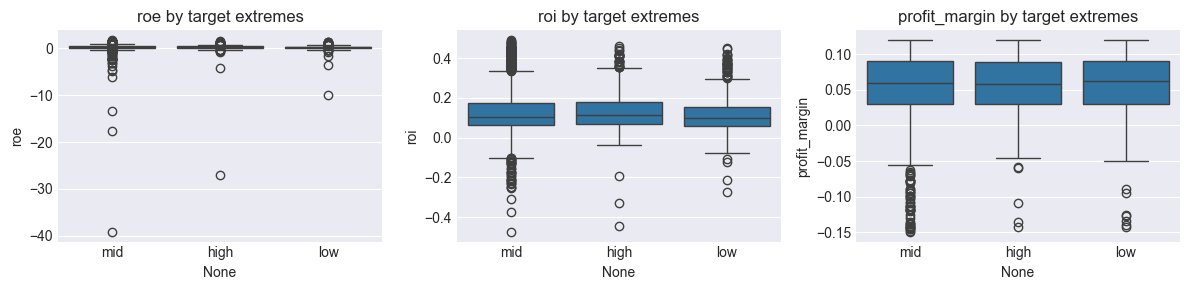

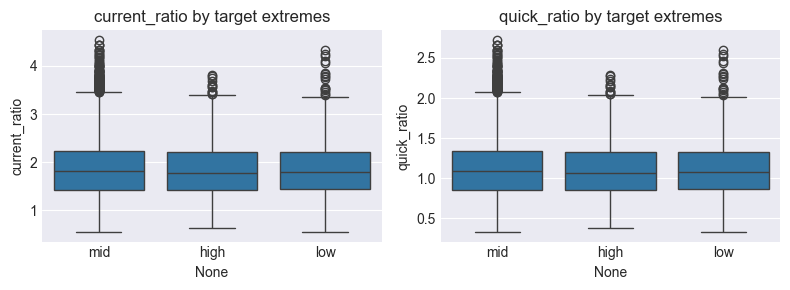

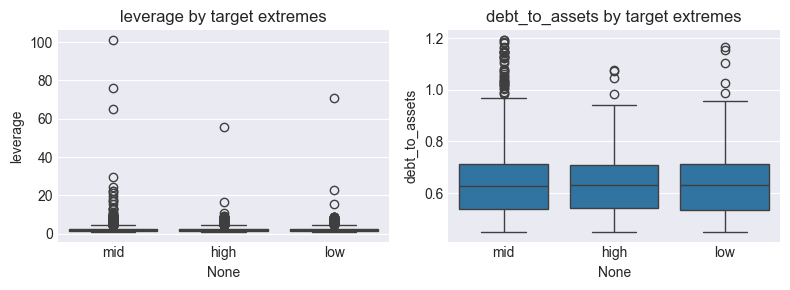

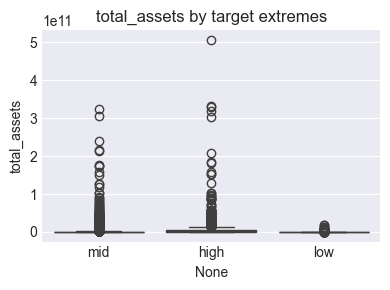

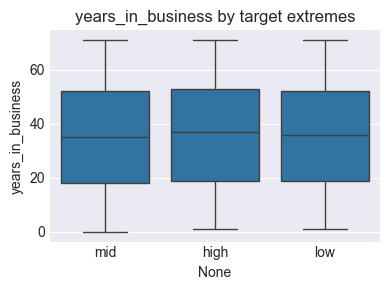

In [31]:
# Compare feature behavior for extreme revenue changes (bottom/top decile)
if TARGET in train_df.columns:
    quantiles = train_df[TARGET].quantile([0.1, 0.9])
    low_thr, high_thr = quantiles.iloc[0], quantiles.iloc[1]
    extreme_flag = pd.Series('mid', index=train_df.index)
    extreme_flag[train_df[TARGET] <= low_thr] = 'low'
    extreme_flag[train_df[TARGET] >= high_thr] = 'high'

    for group, cols in available_groups.items():
        if not cols:
            continue
        plot_cols = cols[:3]  # keep plots readable
        fig, axes = plt.subplots(1, len(plot_cols), figsize=(4 * len(plot_cols), 3))
        if len(plot_cols) == 1:
            axes = [axes]
        for ax, col in zip(axes, plot_cols):
            sns.boxplot(x=extreme_flag, y=train_df[col], ax=ax)
            ax.set_title(f'{col} by target extremes')
        plt.tight_layout()


#### 5) Correlation & multicollinearity (training years only)

Correlation is used to identify redundancy and guide feature grouping, not to select features.



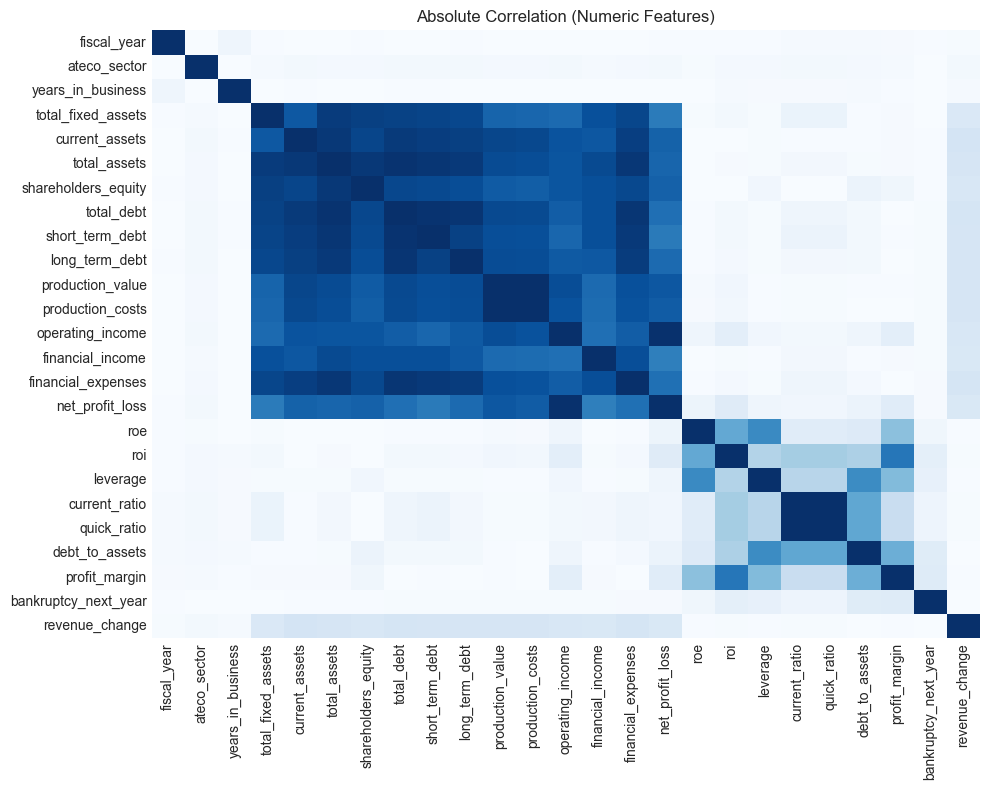

In [32]:
# Correlation matrix on numeric features
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
corr = train_df[numeric_cols].corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='Blues', cbar=False)
plt.title('Absolute Correlation (Numeric Features)')
plt.tight_layout()


#### 6) Sector & time analysis

Use medians to avoid distortion from extreme values.



ATECO sector key (from data dictionary):
01-03: Agriculture, Forestry, Fishing
05-09: Mining and Quarrying
10-33: Manufacturing
35: Electricity, Gas, Steam
36-39: Water Supply, Sewerage, Waste
41-43: Construction
45-47: Wholesale and Retail Trade
49-53: Transportation and Storage
55-56: Accommodation and Food Service
58-63: Information and Communication
64-66: Financial and Insurance Activities
68: Real Estate Activities
69-75: Professional, Scientific, Technical Activities
77-82: Administrative and Support Services
84: Public Administration
85: Education
86-88: Human Health and Social Work
90-93: Arts, Entertainment, Recreation
94-96: Other Service Activities


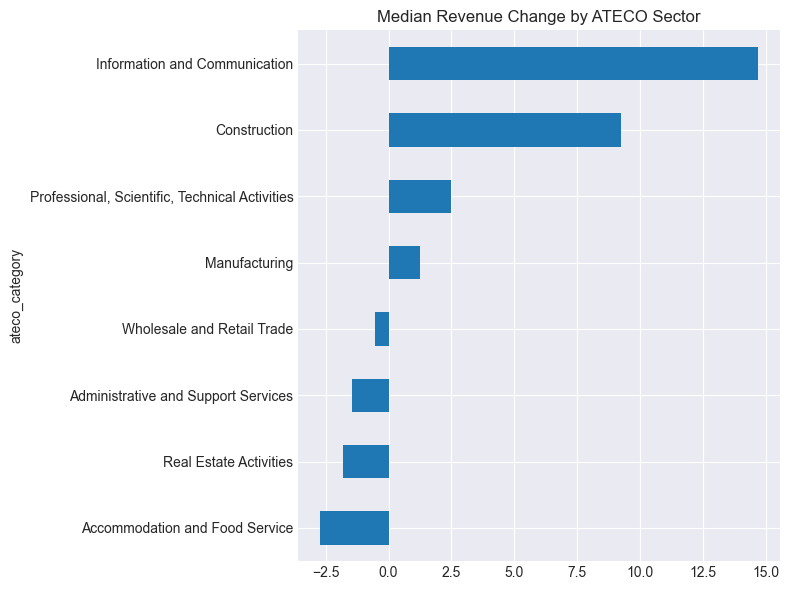

In [33]:
# Sector analysis (ATECO or sector-like column)
sector_cols = [c for c in train_df.columns if 'ateco' in c.lower() or 'sector' in c.lower()]
if sector_cols and TARGET in train_df.columns:
    sector_col = sector_cols[0]

    if 'ateco' in sector_col.lower():
        # ATECO sector key from data dictionary
        ateco_key = [
            (1, 3, 'Agriculture, Forestry, Fishing'),
            (5, 9, 'Mining and Quarrying'),
            (10, 33, 'Manufacturing'),
            (35, 35, 'Electricity, Gas, Steam'),
            (36, 39, 'Water Supply, Sewerage, Waste'),
            (41, 43, 'Construction'),
            (45, 47, 'Wholesale and Retail Trade'),
            (49, 53, 'Transportation and Storage'),
            (55, 56, 'Accommodation and Food Service'),
            (58, 63, 'Information and Communication'),
            (64, 66, 'Financial and Insurance Activities'),
            (68, 68, 'Real Estate Activities'),
            (69, 75, 'Professional, Scientific, Technical Activities'),
            (77, 82, 'Administrative and Support Services'),
            (84, 84, 'Public Administration'),
            (85, 85, 'Education'),
            (86, 88, 'Human Health and Social Work'),
            (90, 93, 'Arts, Entertainment, Recreation'),
            (94, 96, 'Other Service Activities')
        ]

        print('ATECO sector key (from data dictionary):')
        for start, end, name in ateco_key:
            if start == end:
                print(f'{start:02d}: {name}')
            else:
                print(f'{start:02d}-{end:02d}: {name}')

        def ateco_category(code):
            if pd.isna(code):
                return np.nan
            s = str(code).strip()
            digits = ''.join(ch for ch in s if ch.isdigit())
            if len(digits) < 2:
                return np.nan
            val = int(digits[:2])
            for start, end, name in ateco_key:
                if start <= val <= end:
                    return name
            return 'Other/Unknown'

        sector_labels = train_df[sector_col].apply(ateco_category)
        sector_median = train_df.assign(ateco_category=sector_labels).groupby('ateco_category')[TARGET].median().sort_values()
        plt.figure(figsize=(8, 6))
        sector_median.plot(kind='barh')
        plt.title('Median Revenue Change by ATECO Sector')
        plt.tight_layout()
    else:
        sector_median = train_df.groupby(sector_col)[TARGET].median().sort_values()
        plt.figure(figsize=(8, 6))
        sector_median.plot(kind='barh')
        plt.title(f'Median Revenue Change by {sector_col}')
        plt.tight_layout()
else:
    print('Sector column not found or target missing:', sector_cols)



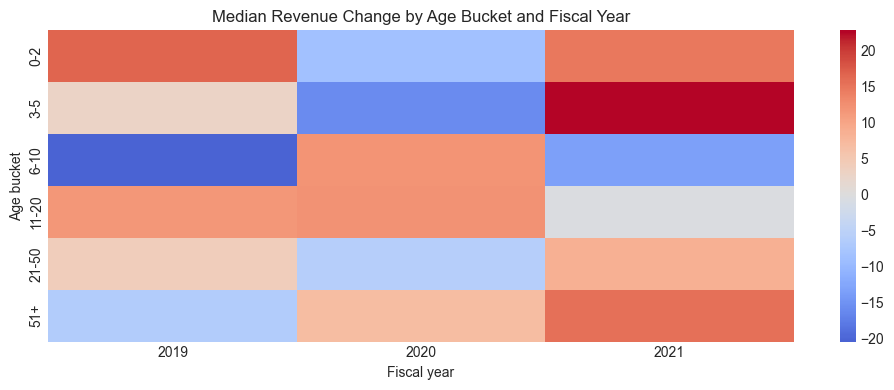

In [34]:
# Cohort view: revenue change by fiscal_year and firm age bucket
if (
    TARGET in train_df.columns
    and 'fiscal_year' in train_df.columns
    and 'years_in_business' in train_df.columns
):
    tmp = train_df[['fiscal_year', 'years_in_business', TARGET]].dropna().copy()
    bins = [0, 2, 5, 10, 20, 50, 100]
    labels = ['0-2', '3-5', '6-10', '11-20', '21-50', '51+']
    tmp['age_bucket'] = pd.cut(
        tmp['years_in_business'],
        bins=bins,
        labels=labels,
        right=True,
        include_lowest=True,
    )
    pivot = tmp.pivot_table(
        index='age_bucket',
        columns='fiscal_year',
        values=TARGET,
        aggfunc='median',
    )
    plt.figure(figsize=(10, 4))
    sns.heatmap(pivot, cmap='coolwarm', center=0)
    plt.title('Median Revenue Change by Age Bucket and Fiscal Year')
    plt.xlabel('Fiscal year')
    plt.ylabel('Age bucket')
    plt.tight_layout()
else:
    print('Cohort view skipped (missing fiscal_year/years_in_business/target).')


#### 7) Leakage audit (explicit)

- Avoid using future information or target-derived features.
- Fit scalers/imputers only on training data.
- Handle lagged features carefully to preserve temporal order.



In [35]:
# Quick scan for potentially leaky column names
leak_keywords = ['future', 'next', 'target', 'revenue_change']
leak_candidates = [c for c in train_df.columns if any(k in c.lower() for k in leak_keywords)]
print('Potential leakage candidates:', leak_candidates)


Potential leakage candidates: ['bankruptcy_next_year', 'revenue_change']


#### 8) EDA → modeling bridge

| EDA finding | Modeling decision |
|---|---|
| Heavy-tailed target | Consider robust loss / winsorization comparison |
| Missing revenue_change (first-year records) | Add missing indicator or drop only when lag required |
| Correlated ratios | Prefer tree-based models or grouped features |
| Temporal drift | Use strict temporal split for validation |
| Sector heterogeneity | Consider sector normalization or sector features |



## 3. Data Preprocessing

Handle missing values, outliers, and prepare data for modeling.

In [36]:
# Create a copy for preprocessing
df_processed = train_df.copy()

# TODO: Handle missing values
# - Decide on imputation strategy (median, mean, by group, etc.)
# - Document your rationale

# TODO: Handle outliers
# - Identify outliers (IQR, winsorization, etc.)
# - Decide on treatment strategy

# TODO: Encode categorical variables
# - One-hot encoding, label encoding, etc.

# Basic cleanup that does not use future information
if 'company_id' in df_processed.columns and 'fiscal_year' in df_processed.columns:
    before = len(df_processed)
    df_processed = df_processed.drop_duplicates(subset=['company_id', 'fiscal_year'])
    print(f'Dropped duplicate (company_id, fiscal_year): {before - len(df_processed)}')

target_col = TARGET if 'TARGET' in globals() and TARGET in df_processed.columns else None

def fit_preprocess(train_df, val_df=None, test_df=None, target_col=None):
    """Fit preprocessing on train only; apply to val/test to avoid leakage."""
    train = train_df.copy()
    val = val_df.copy() if val_df is not None else None
    test = test_df.copy() if test_df is not None else None

    # Missing indicators based on training data only
    missing_cols = [c for c in train.columns if c != target_col and train[c].isna().any()]
    for c in missing_cols:
        train[f'{c}__missing'] = train[c].isna().astype(int)
        if val is not None:
            val[f'{c}__missing'] = val[c].isna().astype(int)
        if test is not None:
            test[f'{c}__missing'] = test[c].isna().astype(int)

    # Column types from training set
    num_cols = train.select_dtypes(include='number').columns.tolist()
    if target_col in num_cols:
        num_cols.remove(target_col)

    cat_cols = [c for c in train.columns if c not in num_cols]
    if target_col in cat_cols:
        cat_cols.remove(target_col)

    # Impute numeric with train medians
    medians = train[num_cols].median()
    train[num_cols] = train[num_cols].fillna(medians)
    if val is not None:
        val[num_cols] = val[num_cols].fillna(medians)
    if test is not None:
        test[num_cols] = test[num_cols].fillna(medians)

    # Winsorize numeric features using train quantiles
    q_low = train[num_cols].quantile(0.01)
    q_high = train[num_cols].quantile(0.99)
    train[num_cols] = train[num_cols].clip(lower=q_low, upper=q_high, axis=1)
    if val is not None:
        val[num_cols] = val[num_cols].clip(lower=q_low, upper=q_high, axis=1)
    if test is not None:
        test[num_cols] = test[num_cols].clip(lower=q_low, upper=q_high, axis=1)

    # Categorical imputation
    for c in cat_cols:
        train[c] = train[c].fillna('Unknown')
        if val is not None:
            val[c] = val[c].fillna('Unknown')
        if test is not None:
            test[c] = test[c].fillna('Unknown')

    # One-hot encode based on training categories only
    train_encoded = pd.get_dummies(train, columns=cat_cols, drop_first=False)
    val_encoded = None
    test_encoded = None
    if val is not None:
        val_encoded = pd.get_dummies(val, columns=cat_cols, drop_first=False)
        val_encoded = val_encoded.reindex(columns=train_encoded.columns, fill_value=0)
    if test is not None:
        test_encoded = pd.get_dummies(test, columns=cat_cols, drop_first=False)
        test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

    artifacts = {
        'medians': medians,
        'q_low': q_low,
        'q_high': q_high,
        'cat_cols': cat_cols,
        'num_cols': num_cols,
        'missing_cols': missing_cols,
    }
    return train_encoded, val_encoded, test_encoded, artifacts

print('Preprocessing setup complete!')


Dropped duplicate (company_id, fiscal_year): 0
Preprocessing setup complete!


In [37]:
# Train/Validation split
# IMPORTANT: Use temporal split, not random!

# For Challenges 1 & 2:
# train_years = [2018, 2019, 2020]
# val_year = 2021

# For Challenge 3 (time series):
# train_years = [2018, 2019]
# val_year = 2020
# test_year = 2021

# TODO: Implement temporal split
# df_train = df_processed[df_processed['fiscal_year'].isin(train_years)]
# df_val = df_processed[df_processed['fiscal_year'] == val_year]

if 'fiscal_year' not in df_processed.columns:
    raise ValueError('fiscal_year column is required for temporal split.')

# Challenge 3 split (fixed by instruction)
train_years = [2018, 2019]
val_year = 2020
test_year = 2021

df_train = df_processed[df_processed['fiscal_year'].isin(train_years)].copy()
df_val = df_processed[df_processed['fiscal_year'] == val_year].copy()
df_test = df_processed[df_processed['fiscal_year'] == test_year].copy()

if target_col is not None:
    df_train = df_train[df_train[target_col].notna()].copy()
    df_val = df_val[df_val[target_col].notna()].copy()
    df_test = df_test[df_test[target_col].notna()].copy()

train_processed, val_processed, test_processed, preprocess_artifacts = fit_preprocess(
    df_train,
    val_df=df_val,
    test_df=df_test,
    target_col=target_col,
)

if target_col is not None:
    X_train = train_processed.drop(columns=[target_col])
    y_train = train_processed[target_col]
    X_val = val_processed.drop(columns=[target_col])
    y_val = val_processed[target_col]
    X_test = test_processed.drop(columns=[target_col])
    y_test = test_processed[target_col]

print(f'Train years: {train_years} | Val year: {val_year} | Test year: {test_year}')
print(
    f'Train/validation split complete! Train: {df_train.shape}, Val: {df_val.shape}, Test: {df_test.shape}'
)


Train years: [2018, 2019] | Val year: 2020 | Test year: 2021
Train/validation split complete! Train: (2941, 30), Val: (2956, 30), Test: (2932, 30)


In [38]:
# Feature scaling
# IMPORTANT: Fit scaler on training data only!

from sklearn.preprocessing import StandardScaler, RobustScaler

# TODO: Choose and apply scaler
# scaler = StandardScaler()  # or RobustScaler() for outlier resistance
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# Use preprocessing artifacts to scale only numeric features (avoid leakage)
if 'preprocess_artifacts' in globals() and 'X_train' in globals():
    scale_cols = [c for c in preprocess_artifacts['num_cols'] if not c.endswith('__missing')]
    scale_cols = [c for c in scale_cols if c in X_train.columns]

    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])

    if 'X_val' in globals() and X_val is not None:
        X_val_scaled = X_val.copy()
        X_val_scaled[scale_cols] = scaler.transform(X_val[scale_cols])
    else:
        X_val_scaled = None

    if 'X_test' in globals() and X_test is not None:
        X_test_scaled = X_test.copy()
        X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])
    else:
        X_test_scaled = None

    print(f'Scaled {len(scale_cols)} numeric features using training fit only.')
else:
    print('Skipping scaling: preprocessing artifacts or train features not found.')

print('Feature scaling complete!')


Scaled 24 numeric features using training fit only.
Feature scaling complete!


## 4. Feature Engineering

Create new features based on domain knowledge.

In [39]:
# Feature Engineering for Challenge 3 (Revenue Forecasting)
# Goal: create lagged, growth, stability, ratio, size, and sector-relative features without leakage.

# Work on a sorted copy to ensure proper time order
if {'company_id', 'fiscal_year'}.issubset(df_processed.columns):
    df_processed = df_processed.sort_values(['company_id', 'fiscal_year']).copy()
else:
    df_processed = df_processed.sort_index().copy()

# Helper functions

def safe_divide(numer, denom):
    return np.where(denom == 0, np.nan, numer / denom)

# Candidate column groups (only keep those that exist)
size_cols = [c for c in ['total_assets', 'revenue'] if c in df_processed.columns]
profit_cols = [c for c in ['net_income', 'ebit', 'ebitda', 'profit_margin', 'roe', 'roi'] if c in df_processed.columns]
liquidity_cols = [c for c in ['current_assets', 'current_liabilities', 'current_ratio', 'quick_ratio'] if c in df_processed.columns]
leverage_cols = [c for c in ['total_liabilities', 'total_debt', 'long_term_debt', 'short_term_debt', 'debt_to_assets', 'leverage'] if c in df_processed.columns]

# 1) Missingness flags for key financials
key_for_missing = list({*size_cols, *profit_cols, *liquidity_cols, *leverage_cols})
for col in key_for_missing:
    df_processed[f'{col}__missing'] = df_processed[col].isna().astype(int)

# 2) Log transforms for size to reduce skew (only non-negative)
for col in size_cols:
    df_processed[f'log1p_{col}'] = np.log1p(df_processed[col].clip(lower=0))

# 3) Core ratios (only if ingredients exist)
if {'total_liabilities', 'total_assets'}.issubset(df_processed.columns):
    df_processed['liabilities_to_assets'] = safe_divide(df_processed['total_liabilities'], df_processed['total_assets'])

if {'total_debt', 'total_assets'}.issubset(df_processed.columns):
    df_processed['debt_to_assets_alt'] = safe_divide(df_processed['total_debt'], df_processed['total_assets'])

if {'total_debt', 'equity'}.issubset(df_processed.columns):
    df_processed['debt_to_equity'] = safe_divide(df_processed['total_debt'], df_processed['equity'])

if {'revenue', 'total_assets'}.issubset(df_processed.columns):
    df_processed['asset_turnover'] = safe_divide(df_processed['revenue'], df_processed['total_assets'])

if {'net_income', 'revenue'}.issubset(df_processed.columns) and 'profit_margin' not in df_processed.columns:
    df_processed['profit_margin'] = safe_divide(df_processed['net_income'], df_processed['revenue'])

if {'current_assets', 'current_liabilities'}.issubset(df_processed.columns):
    df_processed['working_capital'] = df_processed['current_assets'] - df_processed['current_liabilities']
    if 'total_assets' in df_processed.columns:
        df_processed['working_capital_to_assets'] = safe_divide(df_processed['working_capital'], df_processed['total_assets'])

if {'ebit', 'interest_expense'}.issubset(df_processed.columns):
    df_processed['interest_coverage'] = safe_divide(df_processed['ebit'], df_processed['interest_expense'].abs())

# 4) Lagged levels and growth rates (company-level, time-ordered)
if {'company_id', 'fiscal_year'}.issubset(df_processed.columns):
    lag_cols = [c for c in ['revenue', 'total_assets', 'net_income', 'profit_margin', 'roe', 'roi',
                            'current_ratio', 'quick_ratio', 'leverage', 'debt_to_assets'] if c in df_processed.columns]
    for col in lag_cols:
        lag1 = df_processed.groupby('company_id')[col].shift(1)
        df_processed[f'{col}_lag1'] = lag1
        df_processed[f'{col}_yoy'] = safe_divide(df_processed[col] - lag1, np.abs(lag1))

    # 3-year rolling mean and volatility (use only past data)
    roll_cols = [c for c in ['revenue', 'profit_margin', 'roe'] if c in df_processed.columns]
    for col in roll_cols:
        past = df_processed.groupby('company_id')[col].shift(1)
        df_processed[f'{col}_roll3_mean'] = (
            past.groupby(df_processed['company_id']).rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)
        )
        df_processed[f'{col}_roll3_std'] = (
            past.groupby(df_processed['company_id']).rolling(3, min_periods=1).std().reset_index(level=0, drop=True)
        )

# 5) Sector-relative features (median by sector and fiscal year)
sector_cols = [c for c in df_processed.columns if 'ateco' in c.lower() or 'sector' in c.lower()]
if sector_cols and 'fiscal_year' in df_processed.columns:
    sector_col = sector_cols[0]
    rel_cols = [c for c in ['revenue', 'profit_margin', 'roe', 'leverage', 'current_ratio'] if c in df_processed.columns]
    if rel_cols:
        group_key = [sector_col, 'fiscal_year']
        sector_medians = df_processed.groupby(group_key)[rel_cols].transform('median')
        for col in rel_cols:
            df_processed[f'{col}_rel_sector'] = df_processed[col] - sector_medians[col]

print("Feature engineering complete!")
print(f"Total features: {df_processed.shape[1]}")


Feature engineering complete!
Total features: 68


**Engineered Features (auto-generated if inputs exist):**

1. Missingness flags for core financial fields (e.g., `revenue__missing`) to capture reporting gaps.
2. Log size features (`log1p_total_assets`, `log1p_revenue`) to reduce skew and stabilize variance.
3. Core ratios: liabilities-to-assets, debt-to-assets, debt-to-equity, asset turnover, working-capital-to-assets.
4. Profitability/coverage: profit margin (if absent) and interest coverage when `ebit`/`interest_expense` exist.
5. Lagged levels and YoY growth for key metrics (revenue, assets, profitability, liquidity, leverage).
6. Rolling 3-year mean and volatility (past-only) for revenue and profitability proxies.
7. Sector-relative features (company minus sector median by year) to capture competitive position.


## 5. Model Development

Train multiple models and compare performance.

In [40]:
# Import models
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    f1_score, roc_auc_score, accuracy_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from xgboost import XGBClassifier, XGBRegressor

# For handling class imbalance (Challenges 1 & 2)
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

print("Model libraries imported!")

Model libraries imported!


In [41]:
# Prepare features and target for modeling
# Prefer preprocessed/encoded data to avoid string-to-float errors.

if target_col is None:
    raise ValueError('target_col is not set. Define it during preprocessing before modeling.')

# Use preprocessed, encoded splits when available
if 'train_processed' in globals() and train_processed is not None:
    X_train = train_processed.drop(columns=[target_col])
    y_train = train_processed[target_col]
    X_val = val_processed.drop(columns=[target_col]) if 'val_processed' in globals() and val_processed is not None else None
    y_val = val_processed[target_col] if 'val_processed' in globals() and val_processed is not None else None
    X_test = test_processed.drop(columns=[target_col]) if 'test_processed' in globals() and test_processed is not None else None
    y_test = test_processed[target_col] if 'test_processed' in globals() and test_processed is not None else None
else:
    # Fallback to raw splits (will require categorical handling later)
    id_like = [c for c in ['company_id', 'fiscal_year'] if c in df_train.columns]
    feature_cols = [c for c in df_train.columns if c not in id_like + [target_col]]

    X_train = df_train[feature_cols].copy()
    X_val = df_val[feature_cols].copy() if 'df_val' in globals() and df_val is not None else None
    X_test = df_test[feature_cols].copy() if 'df_test' in globals() and df_test is not None else None

    y_train = df_train[target_col].copy()
    y_val = df_val[target_col].copy() if 'df_val' in globals() and df_val is not None else None
    y_test = df_test[target_col].copy() if 'df_test' in globals() and df_test is not None else None

print('Target:', target_col)
print('Train/Val/Test shapes:', X_train.shape, X_val.shape if X_val is not None else None, X_test.shape if X_test is not None else None)


Target: revenue_change
Train/Val/Test shapes: (2941, 3010) (2956, 3010) (2932, 3010)


### Baseline Model

In [42]:
# Baseline model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Determine task type
is_regression = target_col == 'revenue_change'

if is_regression:
    # Use scaled features if available, otherwise raw
    X_tr = X_train_scaled if 'X_train_scaled' in globals() else X_train
    X_va = X_val_scaled if 'X_val_scaled' in globals() and X_val_scaled is not None else X_val

    baseline_model = LinearRegression()
    baseline_model.fit(X_tr, y_train)
    y_pred_baseline = baseline_model.predict(X_va)

    rmse = mean_squared_error(y_val, y_pred_baseline, squared=False)
    mae = mean_absolute_error(y_val, y_pred_baseline)
    r2 = r2_score(y_val, y_pred_baseline)

    print('Baseline Linear Regression (Validation)')
    print(f'RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f}')
else:
    # Classification baseline (keep for Challenges 1 & 2)
    baseline_model = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced', max_iter=1000)
    X_tr = X_train_scaled if 'X_train_scaled' in globals() else X_train
    X_va = X_val_scaled if 'X_val_scaled' in globals() and X_val_scaled is not None else X_val

    baseline_model.fit(X_tr, y_train)
    y_pred_baseline = baseline_model.predict(X_va)

    print('Baseline Logistic Regression (Validation)')
    print(classification_report(y_val, y_pred_baseline))


Baseline Linear Regression (Validation)
RMSE: 4762.3889 | MAE: 902.8847 | R2: -0.1948


### Advanced Models

In [43]:
# Advanced models

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

if is_regression:
    # Tree-based models handle non-linearities and interactions
    rf_model = RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_val)
    results.append({
        'Model': 'RandomForest',
        'RMSE': mean_squared_error(y_val, rf_pred, squared=False),
        'MAE': mean_absolute_error(y_val, rf_pred),
        'R2': r2_score(y_val, rf_pred)
    })

    gbr_model = GradientBoostingRegressor(random_state=RANDOM_STATE)
    gbr_model.fit(X_train, y_train)
    gbr_pred = gbr_model.predict(X_val)
    results.append({
        'Model': 'GradientBoosting',
        'RMSE': mean_squared_error(y_val, gbr_pred, squared=False),
        'MAE': mean_absolute_error(y_val, gbr_pred),
        'R2': r2_score(y_val, gbr_pred)
    })

    # XGBoost if available
    try:
        xgb_model = XGBRegressor(
            n_estimators=400,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=RANDOM_STATE,
            objective='reg:squarederror'
        )
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict(X_val)
        results.append({
            'Model': 'XGBoost',
            'RMSE': mean_squared_error(y_val, xgb_pred, squared=False),
            'MAE': mean_absolute_error(y_val, xgb_pred),
            'R2': r2_score(y_val, xgb_pred)
        })
    except Exception as e:
        print('XGBoost not available or failed:', e)
else:
    # Classification models for Challenges 1 & 2
    rf_model = RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_val)
    results.append({'Model': 'RandomForest', 'F1': f1_score(y_val, rf_pred, average='weighted')})

    try:
        xgb_model = XGBClassifier(
            n_estimators=400,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=RANDOM_STATE,
            eval_metric='logloss'
        )
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict(X_val)
        results.append({'Model': 'XGBoost', 'F1': f1_score(y_val, xgb_pred, average='weighted')})
    except Exception as e:
        print('XGBoost not available or failed:', e)

# Show comparison table
if results:
    models_comparison = pd.DataFrame(results)
    print(models_comparison.sort_values(by=models_comparison.columns[1], ascending=False))


              Model         RMSE         MAE        R2
1  GradientBoosting  4607.406611  649.095808 -0.118325
2           XGBoost  4508.152846  649.424204 -0.070662
0      RandomForest  4259.709153  617.394135  0.044095


In [44]:
# TODO: Hyperparameter tuning
# Use GridSearchCV or RandomizedSearchCV

from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Example:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(
#     RandomForestClassifier(random_state=RANDOM_STATE),
#     param_grid,
#     cv=StratifiedKFold(n_splits=5),
#     scoring='f1',
#     n_jobs=-1
# )
# grid_search.fit(X_train_scaled, y_train)
# best_model = grid_search.best_estimator_

print("Hyperparameter tuning complete!")

Hyperparameter tuning complete!


## 6. Model Evaluation

Compare models and select the best one.

In [45]:
# TODO: Create model comparison table
# Compare all models on validation set using appropriate metrics

# For Challenge 1: F1-Score, AUC-ROC, Precision, Recall
# For Challenge 2: Weighted F1, Macro F1, Accuracy, Confusion Matrix
# For Challenge 3: RMSE, MAE, MAPE, R², Directional Accuracy

# Example comparison:
# models_comparison = pd.DataFrame({
#     'Model': ['Baseline', 'Random Forest', 'XGBoost'],
#     'F1-Score': [...],
#     'AUC-ROC': [...],
#     'Precision': [...],
#     'Recall': [...]
# })
# print(models_comparison)

In [46]:
# TODO: Confusion Matrix (for classification)
# from sklearn.metrics import ConfusionMatrixDisplay

# ConfusionMatrixDisplay.from_estimator(best_model, X_val_scaled, y_val)
# plt.title('Confusion Matrix - Best Model')
# plt.show()

In [47]:
# TODO: ROC Curve (for binary classification)
# from sklearn.metrics import RocCurveDisplay

# RocCurveDisplay.from_estimator(best_model, X_val_scaled, y_val)
# plt.title('ROC Curve - Best Model')
# plt.show()

**Model Selection:**

TODO: Justify your final model choice
- 
- 

## 7. Interpretation and Business Insights

Explain the model and extract business value.

In [48]:
# TODO: Feature Importance
# For tree-based models, use built-in feature importance
# For other models, consider SHAP values

# Example:
# feature_importance = pd.DataFrame({
#     'feature': feature_cols,
#     'importance': best_model.feature_importances_
# }).sort_values('importance', ascending=False)

# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
# plt.xlabel('Importance')
# plt.title('Top 15 Most Important Features')
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

In [49]:
# TODO: Error Analysis
# - Which cases does the model misclassify/mispredicts?
# - Are there patterns in the errors?
# - How do errors vary by sector, size, region, etc.?

# Example:
# errors_df = df_val.copy()
# errors_df['prediction'] = y_pred
# errors_df['error'] = (errors_df['prediction'] != errors_df[target_col])

# print("Error rate by sector:")
# print(errors_df.groupby('ateco_sector')['error'].mean().sort_values(ascending=False))

**Business Insights:**

TODO: Translate technical findings into business language

**Key Risk Factors** (for bankruptcy/health challenges):
1. 
2. 
3. 

**Revenue Drivers** (for forecasting challenge):
1. 
2. 
3. 

**Actionable Recommendations:**
- 
- 
- 

## 8. Conclusions and Future Work

Summarize findings and discuss limitations.

**Summary:**

TODO: Summarize your work
- 
- 

**Performance vs Targets:**

TODO: Compare your results to challenge targets
- My F1-Score: [X.XX] vs Target: [0.55-0.70]
- ...

**Model Limitations:**

TODO: Discuss limitations honestly
1. 
2. 
3. 

**Future Improvements:**

TODO: What would you do with more time?
1. 
2. 
3. 

**Lessons Learned:**

TODO: Reflect on the experience
- 
- 

---

## Final Checklist

Before submitting, verify:

- [ ] All code cells execute without errors
- [ ] Markdown cells explain each step clearly
- [ ] Visualizations are clear and labeled
- [ ] Feature importance is analyzed
- [ ] Error analysis is performed
- [ ] Business insights are provided
- [ ] Model limitations are discussed
- [ ] Code is well-commented
- [ ] Results meet or exceed minimum performance targets
- [ ] No data leakage (temporal split, proper scaling, etc.)
- [ ] Citations for any external code/resources

**Good luck with your challenge!** 🚀